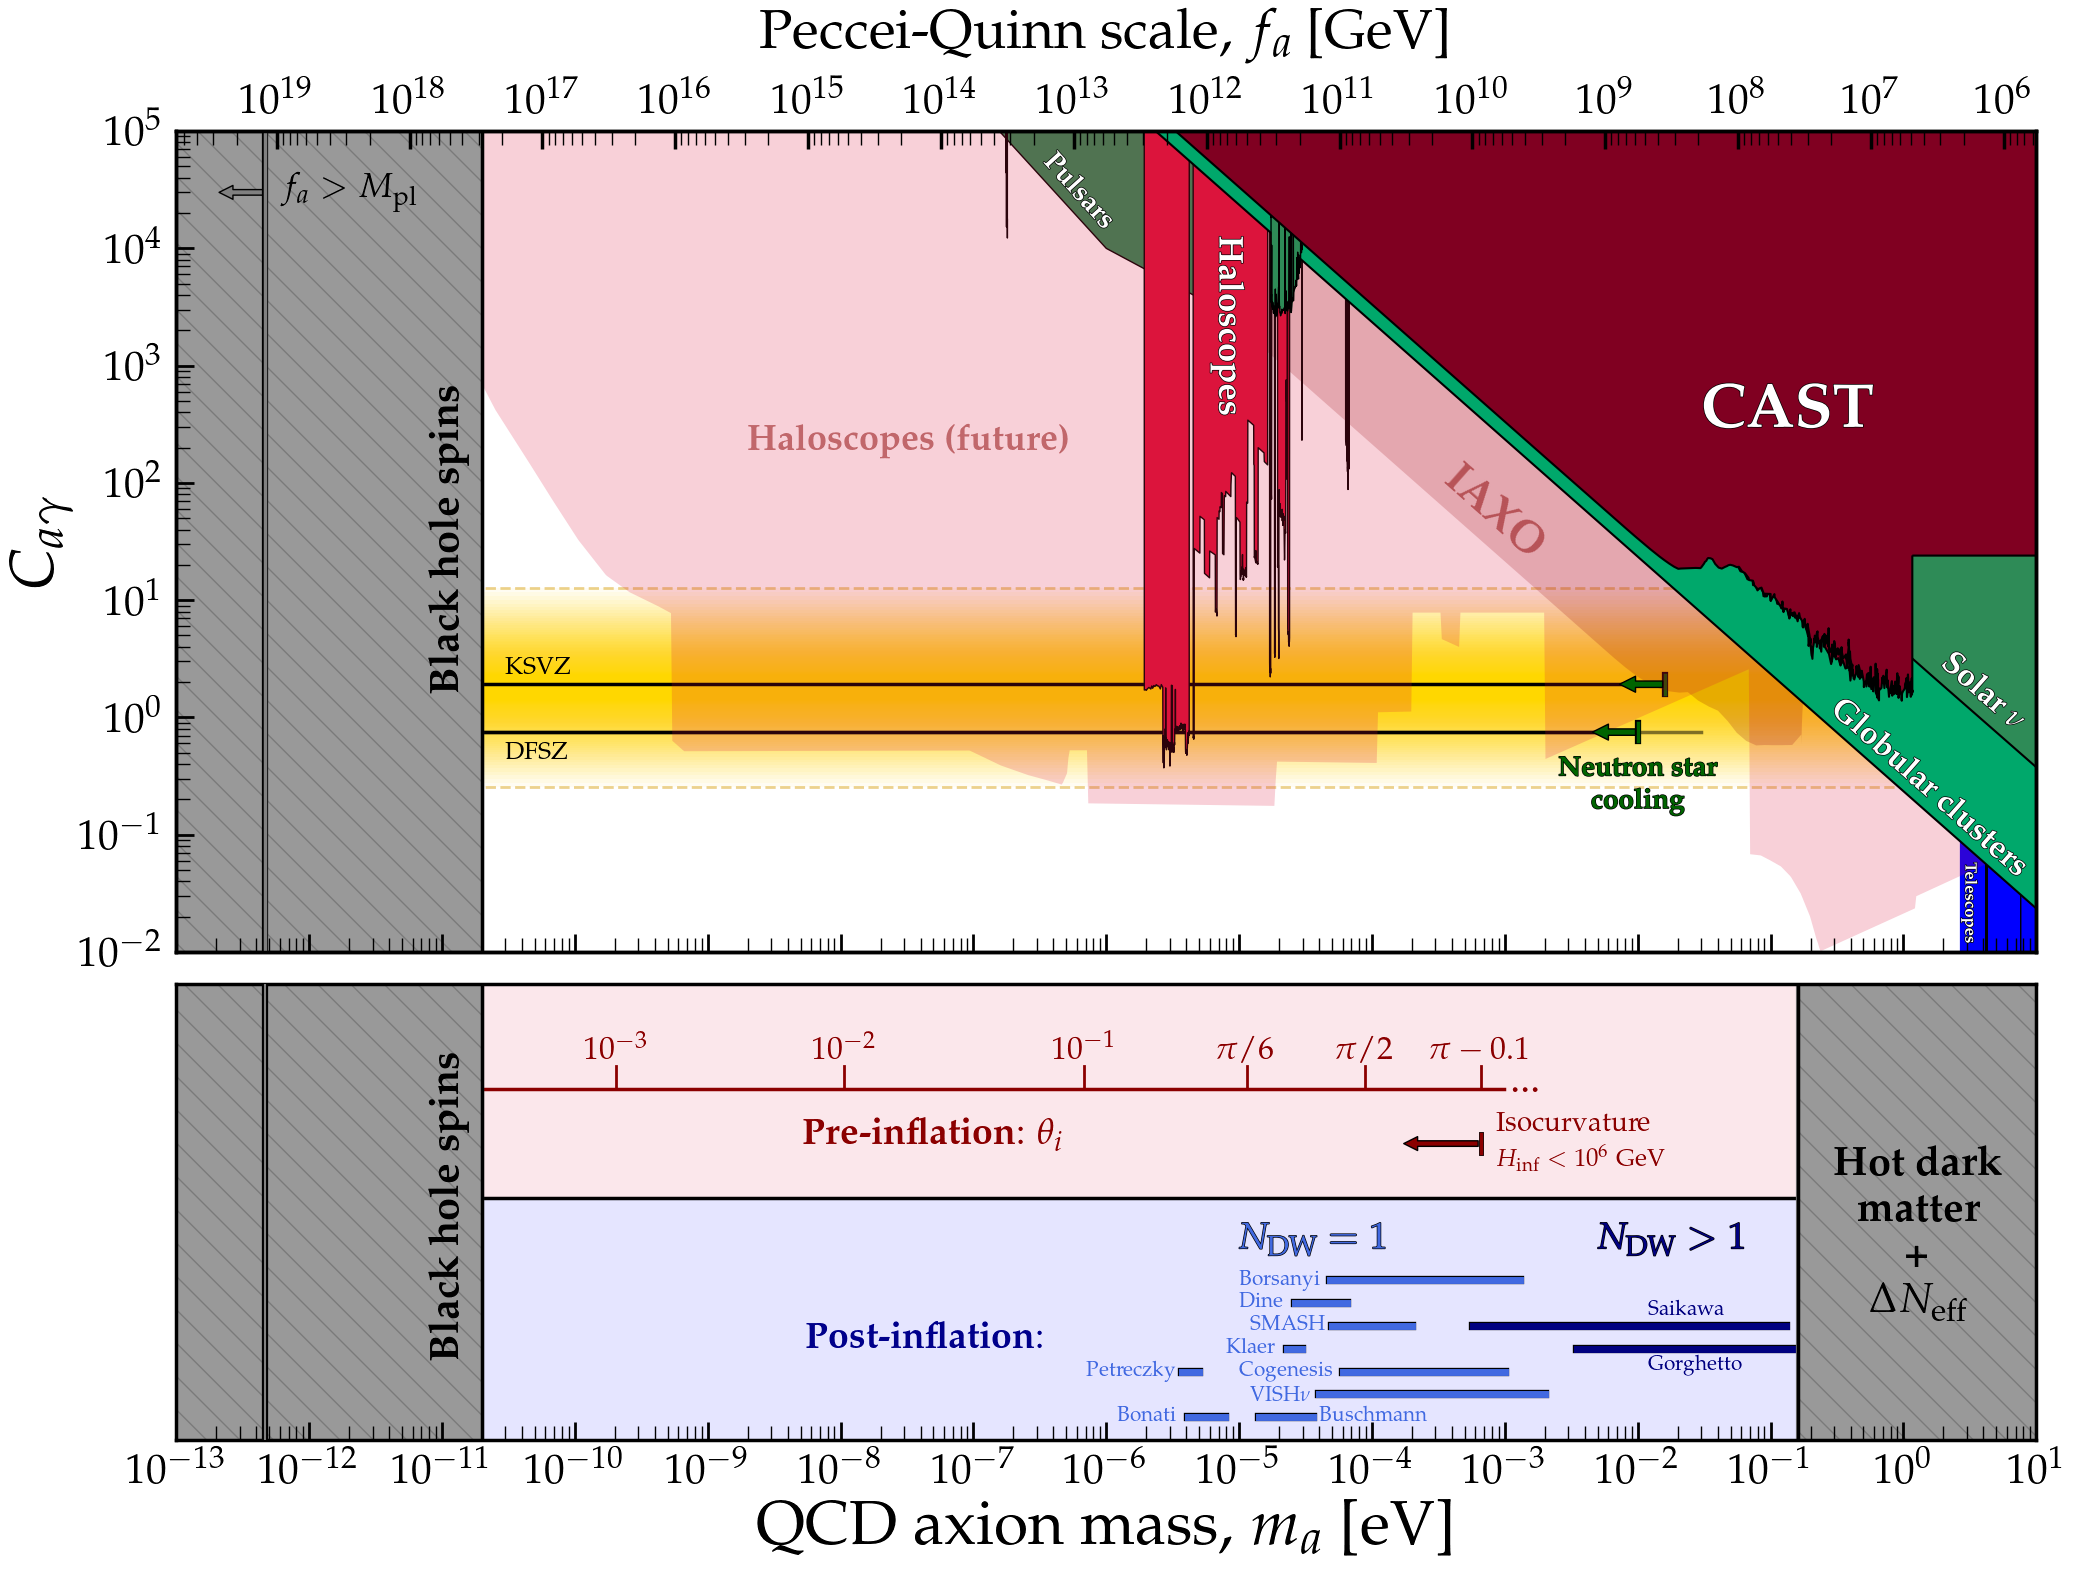

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from PlotFuncs import MyDoublePlot_Vertical,AxionPhoton,MySaveFig,UpperFrequencyAxis_Simple,col_alpha,FigSetup,line_background

pek = line_background(1,'k')


def UpperPQAxis(ax,tickdir='in',xtick_rotation=0,labelsize=25,xlabel=r"Peccei-Quinn scale, $f_a$ [GeV]",lfs=40,tick_pad=4,tfs=30,xlabel_pad=25):
    m_min,m_max = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlabel(xlabel,fontsize=lfs,labelpad=xlabel_pad)
    ax2.set_xscale('log')
    plt.xticks(rotation=xtick_rotation)
    ax2.tick_params(labelsize=tfs)
    ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=tick_pad)
    ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
    ax2.xaxis.set_major_locator(locmaj)
    ax2.xaxis.set_minor_locator(locmin)
    ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax2.set_xlim([1e12*(5.7e-6/m_min),1e12*(5.7e-6/m_max)])
    plt.sca(ax)

def PlotDimensionlessCoupling(ax,filename,edgecolor='k',facecolor='crimson',alpha=1,lw=1.5,y2=1e10,zorder=0.1):
    dat = loadtxt(filename)
    ax.fill_between(dat[:,0],dat[:,1]/(2e-10*dat[:,0]),y2=y2,color=facecolor,alpha=alpha,zorder=zorder,lw=0)
    ax.plot(dat[:,0],dat[:,1]/(2e-10*dat[:,0]),color=edgecolor,zorder=zorder,lw=lw)
    return

def PlotTheoryMass(ax,file,y,ybar=0.0,color='blue',lw=5,label='',text_pos=[1.0,1.0],fs=15,zorder=0):
    m_low,m_high = loadtxt('limit_data/AxionMass/'+file+'.txt',unpack=True)
    ax.plot([m_low,m_high],[y,y],'-',color=color,lw=5,path_effects=line_background(6,'k'),zorder=zorder)
    ax.plot([m_low*0.98,m_low*0.98],[y-ybar,y+ybar],'-',lw=3,color=color,zorder=zorder)
    ax.plot([m_high*1.01,m_high*1.01],[y-ybar,y+ybar],'-',lw=3,color=color,zorder=zorder)
    
    ax.text(text_pos[0],text_pos[1],label,fontsize=fs,color=color,rotation=0,clip_on=True,va='center')
    return

# Figure setup
m_min = 1e-13
m_max = 1e1
C_min = 1e-2
C_max = 1e5
fig,ax1,ax2 = MyDoublePlot_Vertical('','$C_{a\gamma}$','QCD axion mass, $m_a$ [eV]',size_x=24,size_y=17,height_ratios=[1.8,1],lfs=45)
ax1.set_xlim([m_min,m_max])
ax1.set_ylim([C_min,C_max])
ax2.set_xlim([m_min,m_max])
ax2.set_ylim([0,1])      
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax1.xaxis.set_major_locator(locmaj)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(locmaj)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.set_xticklabels([])
ax2.set_yticks([])
UpperPQAxis(ax1)

# Upper axis
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/CAST_highm.txt",facecolor=[0.5, 0.0, 0.13],zorder=0.2)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/CAST.txt",facecolor=[0.5, 0.0, 0.13],zorder=0.2)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/GlobularClusters.txt",facecolor=[0.0, 0.66, 0.42],zorder=0.1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/SolarNu.txt",facecolor='seagreen',zorder=0.1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/Haloscopes_Combined_microeV-meV.txt",facecolor='crimson',zorder=0,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/ADMX_SLIC.txt",facecolor='crimson',zorder=0,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/HST.txt",facecolor='blue',zorder=0,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/Telescopes_VIMOS.txt",facecolor='blue',zorder=0,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/Telescopes_MUSE.txt",facecolor='blue',zorder=0,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/PulsarPolarCap.txt",facecolor='SeaGreen',zorder=-1,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/OSQAR.txt",facecolor='#a83246',zorder=0.3,lw=1)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/NeutronStars_BreakthroughListen.txt",facecolor='SeaGreen',zorder=0.1,lw=1)


PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/Projections/HaloscopeProjections_Combined.txt",facecolor='crimson',zorder=0,alpha=0.2,lw=0)
PlotDimensionlessCoupling(ax1,"limit_data/AxionPhoton/Projections/IAXO.txt",facecolor='darkred',zorder=-1.1,alpha=0.2,lw=0)

# ax1.text(0.6e-8,3.5e-1,'DM-Radio',color='darkred',alpha=0.5,fontsize=15)
# ax1.text(1.8e-7,3.3e-1,'SRF',color='darkred',alpha=0.5,fontsize=15,rotation=-23)
# ax1.text(0.8e-6,1.2e-1,'FLASH, ADMX, CAPP',color='darkred',alpha=0.5,fontsize=13,rotation=0)
# ax1.text(8e-6,4.7e-1,'HAYSTAC, QUAX',color='darkred',alpha=0.5,fontsize=13,rotation=0)
# ax1.text(0.83e-4,7,'ORGAN',color='darkred',alpha=0.5,fontsize=13,rotation=0,ha='center')
# ax1.text(0.83e-4,7/1.7,'MADMAX',color='darkred',alpha=0.5,fontsize=13,rotation=0,ha='center')
# ax1.text(0.83e-4,7/(1.7*1.7),'ALPHA',color='darkred',alpha=0.5,fontsize=13,rotation=0,ha='center')
# ax1.text(6e-4,9,'BRASS, BREAD',color='darkred',alpha=0.5,fontsize=13,rotation=0,ha='center')
# ax1.text(3.9e-4,2.6,'CADEx',color='darkred',alpha=0.5,fontsize=13,rotation=-17,ha='center')
# ax1.text(0.55,1.4e-2,'LAMPOST',color='darkred',alpha=0.5,fontsize=13,rotation=23,ha='center')

# QCD axion hadronic band
m = array([m_min,m_max])
C1 = 44/3-1.92
C2 = abs(5/3-1.92)
plt.plot(m,[C1,C1],'--',color='goldenrod',lw=2,alpha=0.5,zorder=-100)
plt.plot(m,[C2,C2],'--',color='goldenrod',lw=2,alpha=0.5,zorder=-100)
for i in linspace(1,10,100):
    ax1.fill_between(m,C1/i,C2*i,alpha=0.05,color='gold',zorder=-100,lw=0)

# QCD models
m_KSVZ = array([m_min,16e-3])
ax1.plot(m_KSVZ,[1.92,1.92],'-',color='k',lw=2.5,alpha=1,zorder=-100)
ax1.plot([m_KSVZ[1],m_KSVZ[1]],array([1/1.2,1.2])*1.92,color='DarkGreen',lw=2.5,zorder=-100,path_effects=line_background(4.5,'k'))
m_DFSZ_lower = array([m_min,10e-3])
ax1.plot(m_DFSZ_lower,[0.75,0.75],'-',color='k',lw=2.5,alpha=1,zorder=-100)
m_DFSZ_upper = array([m_min,30e-3])
ax1.plot(m_DFSZ_upper,[0.75,0.75],'-',color='k',lw=2.5,alpha=0.5,zorder=-100)
ax1.plot([m_DFSZ_lower[1],m_DFSZ_lower[1]],array([1/1.2,1.2])*0.75,color='DarkGreen',lw=2.5,zorder=-100,path_effects=line_background(4.5,'k'))
ax1.annotate("",xy=(m_KSVZ[1]/2.3,1.92), xycoords='data',
            xytext=(m_KSVZ[1]*1.01,1.92), textcoords='data',size=23,
            arrowprops=dict(arrowstyle="simple",facecolor='DarkGreen'))
ax1.annotate("",xy=(m_DFSZ_lower[1]/2.3,0.75), xycoords='data',
            xytext=(m_DFSZ_lower[1]*1.01,0.75), textcoords='data',size=23,
            arrowprops=dict(arrowstyle="simple",facecolor='DarkGreen'))
ax1.text(1e-2,0.32,r'{\bf Neutron star}',fontsize=20,color='DarkGreen',path_effects=pek,ha='center')
ax1.text(1e-2,0.32/1.9,r'{\bf cooling}',fontsize=20,color='DarkGreen',path_effects=pek,ha='center')

ax1.text(3e-11,1.92*1.2,'KSVZ',fontsize=18)
ax1.text(3e-11,0.75/1.2,'DFSZ',fontsize=18,va='top')



# Black hole spins
ax1.fill_between([m_min,2e-11],[C_min,C_min],C_max,color='gray',lw=3)
ax1.fill_between([m_min,2e-11],[C_min,C_min],C_max,color='w',alpha=0.2,lw=1.5,hatch='\\',edgecolor='k')

ax1.axvline(2e-11,color='k',lw=2.5)
ax1.text(0.8e-11,2e0,r'{\bf Black hole spins}',fontsize=30,rotation=90)

# Planck mass
ax1.axvline((1e12/1.22e19)*5.7e-6,lw=2.5,linestyle='-',alpha=1,color='gray',path_effects=line_background(4.5,'k'),zorder=10)
ax1.text(6e-13,3e4,r'$f_a>M_{\rm pl}$',fontsize=25,alpha=1,rotation=0,va='center')
ax1.annotate("",xy=(2e-13,3e4), xycoords='data',
            xytext=(4.8e-13,3e4), textcoords='data',size=20,
            arrowprops=dict(arrowstyle="simple",facecolor='gray'))

# Labels
ax1.text(0.3e-6,1.5e4,r'{\bf Pulsars}',color='w',path_effects=pek,rotation=-48,fontsize=20)
ax1.text(0.6e-5,4.5e2,r'{\bf Haloscopes}',color='w',path_effects=pek,rotation=-90,fontsize=25)
ax1.text(0.3e-1,3e2,r'{\bf CAST}',color='w',path_effects=pek,rotation=0,fontsize=45)
ax1.text(2.5e-1,0.045,r'{\bf Globular clusters}',color='w',path_effects=pek,rotation=-41.5,fontsize=23)
ax1.text(1.7,0.8,r'{\bf Solar $\nu$}',color='w',path_effects=pek,rotation=-41.5,fontsize=23)
ax1.text(2.7,1.3e-2,r'{\bf Telescopes}',color='w',path_effects=pek,rotation=-90,fontsize=12)
ax1.text(0.3e-3,2.3e1,r'{\bf IAXO}',color='darkred',fontsize=32,rotation=-41.5,alpha=0.5)
ax1.text(2e-9,1.9e2,r'{\bf Haloscopes (future)}',color='darkred',fontsize=26,rotation=0,alpha=0.5)




########


# Lower axis 
ax2.tick_params(which='minor',top=False)
ax2.tick_params(which='major',top=False)
ax2.axhline(0.53,color='k',lw=2.5,zorder=-100)
ax2.fill_between([m_min,m_max],[0,0],[0.53,0.53],color='blue',zorder=-1000,alpha=0.1,lw=0)
ax2.fill_between([m_min,m_max],[0.53,0.53],[1,1],color='crimson',zorder=-1000,alpha=0.1,lw=0)

# Hot dark matter
ax2.fill_between([0.16,m_max],[0,0],1,color='gray',lw=3)
ax2.fill_between([0.16,m_max],[0,0],1,color='w',alpha=0.2,lw=1.5,hatch='\\',edgecolor='k')
ax2.axvline(0.16,color='k',lw=2.5)
ax2.text(1.3e0,0.6,r'{\bf Hot dark}',fontsize=30,ha='center',va='center')
ax2.text(1.3e0,0.5,r'{\bf matter}',fontsize=30,ha='center',va='center')
ax2.text(1.3e0,0.4,r'{\bf +}',fontsize=30,ha='center',va='center')
ax2.text(1.3e0,0.3,r'{\bf $\Delta N_{\rm eff}$}',fontsize=30,ha='center',va='center')


# Black hole spins
ax2.fill_between([m_min,2e-11],[0,0],1,color='gray',lw=3)
ax2.fill_between([m_min,2e-11],[0,0],1,color='w',alpha=0.2,lw=1.5,hatch='\\',edgecolor='k')
ax2.axvline(2e-11,color='k',lw=2.5)

# Planck mass
ax2.axvline((1e12/1.22e19)*5.7e-6,alpha=1,color='gray',path_effects=line_background(4.5,'k'),zorder=10)


# Pre-inflation
col0 = 'darkred'
thvals = array([0.001,0.01,0.1,pi/6,pi/2,pi-0.1])
thlab = array([r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$\pi/6$',r'$\pi/2$',r'$\pi-0.1$'])
fth = 2e11*(1/thvals**2)**(6/7)
mth = 5.7e-6*(1e12/fth)

thi,ma = flipud(loadtxt('limit_data/AxionMass/PreInflation.txt',unpack=True))
mth[2] = interp(0.1,thi,ma)
mth[3] = interp(pi/6,thi,ma)
mth[4] = interp(pi/2,thi,ma)
mth[5] = interp(pi-0.1,thi,ma)

yl = 0.77
tl = 0.05
ax2.plot([1e-13,mth[-1]*1.5],[yl,yl],'-',lw=2.5,zorder=-1,color=col0)
ax2.text(mth[-1]*1.7,yl*1.017,'...',color=col0,va='center',ha='left')
for i in range(0,size(thvals)):
    ax2.plot([mth[i],mth[i]],[yl,yl+tl],'-',lw=2,color=col0)
    ax2.text(mth[i],yl+tl*1.6,thlab[i],fontsize=23,ha='center',va='center',color=col0)
ax2.text(0.5e-7,yl-0.1,r'{\bf Pre-inflation}: $\theta_i$',color=col0,va='center',ha='center',fontsize=27)

# Isocurvature bound on H_I
ax2.plot([mth[5],mth[5]],0.65+array([-0.02,0.02]),lw=2.5,color='darkred',path_effects=line_background(3.5,'k'))
ax2.annotate("",xy=(mth[5]/4,0.65), xycoords='data',
            xytext=(mth[5],0.65), textcoords='data',size=20,
            arrowprops=dict(arrowstyle="simple",facecolor='darkred'))
ax2.text(mth[5]*1.3,0.69,'Isocurvature',color='darkred',fontsize=20,va='center')
ax2.text(mth[5]*1.3,0.615,r'$H_{\rm inf} < 10^6$~GeV',color='darkred',fontsize=18,va='center')

# Post-inflation
ax2.text(3.5e-7,0.2,r'{\bf Post-inflation}:',fontsize=27,ha='right',color='darkblue')

col1 = 'royalblue'
col2 = 'navy'
ax2.text(1e-5,0.42,r'$N_{\rm DW}=1$',color=col1,fontsize=27,path_effects=pek)
PlotTheoryMass(ax2,'Borsanyi16',0.35,color=col1,text_pos=[1e-5,0.35],label="Borsanyi")
PlotTheoryMass(ax2,'Dine17',0.3,color=col1,text_pos=[1e-5,0.3],label="Dine")
PlotTheoryMass(ax2,'Ballesteros16',0.25,color=col1,text_pos=[1.2e-5,0.25],label="SMASH")
PlotTheoryMass(ax2,'Klaer17',0.2,color=col1,text_pos=[0.8e-5,0.2],label="Klaer")
PlotTheoryMass(ax2,'Co20',0.15,color=col1,text_pos=[10e-6,0.15],label="Cogenesis")
PlotTheoryMass(ax2,'Petreczky16',0.15,color=col1,text_pos=[0.7e-6,0.15],label="Petreczky")
PlotTheoryMass(ax2,'Buschmann20',0.05,color=col1,text_pos=[4e-5,0.05],label="Buschmann")
PlotTheoryMass(ax2,'Bonati16',0.05,color=col1,text_pos=[1.2e-6,0.05],label="Bonati")
PlotTheoryMass(ax2,'VISHnu',0.1,color=col1,text_pos=[12e-6,0.095],label=r"VISH$\nu$")

ax2.text(5e-3,0.42,r'$N_{\rm DW}>1$',color=col2,fontsize=27,path_effects=pek)
PlotTheoryMass(ax2,'SaikawaDW_6_9',0.25,color=col2,text_pos=[12e-3,0.285],label=r"Saikawa")
PlotTheoryMass(ax2,'GorghettoDW_6',0.2,color=col2,text_pos=[12e-3,0.163],label=r"Gorghetto",zorder=-1)




ax2.text(0.8e-11,0.2,r'{\bf Black hole spins}',fontsize=30,rotation=90)

MySaveFig(fig,'AxionMass')

TwistedAnyonCavity
LAMPOST2
WISPLC
ADMX_Projected
ADBC
aLIGO
BREAD
MADMAX
BRASS
CADEx
DANCE
DMRadio
FLASH
SRF
TOORAD_eV


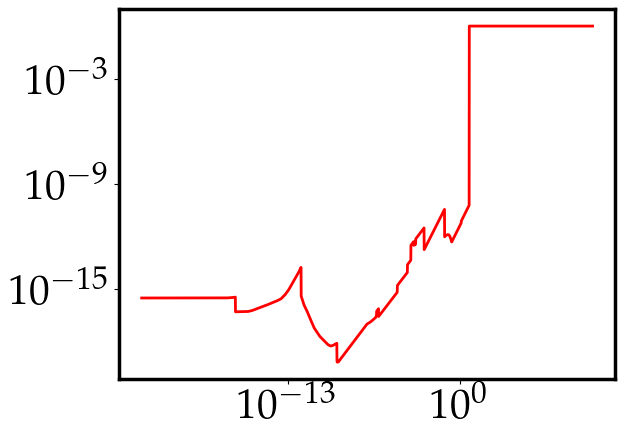

In [3]:
files = ['TwistedAnyonCavity','LAMPOST2','WISPLC','ADMX_Projected','ADBC','aLIGO','BREAD','MADMAX','BRASS','CADEx','DANCE','DMRadio','FLASH','SRF','TOORAD_eV']
mmin = 1e-24
mmax = 1e10
nvals = 3000
mvals = logspace(log10(mmin),log10(mmax),nvals)

g = zeros(shape=nvals)
for file in files:
    print(file)
    dat = loadtxt("limit_data/AxionPhoton/Projections/"+file+".txt")
    g1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    g1[mvals<amin(dat[:,0])] = inf
    g1[mvals>amax(dat[:,0])] = inf
    g = column_stack((g,g1))
g = g[:,1:]

g = amin(g,1)

g[g==inf] = 1
plt.loglog(mvals,g,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/AxionPhoton/Projections/HaloscopeProjections_Combined.txt',column_stack((mvals,g)))


RBF_UF_Haloscopes
UF
ADMX
ADMX2018
ADMX2019_1
ADMX2019_2
ADMX2021
CAPP-1
CAPP-2
CAPP-3
CAPP-4
CAPP-5
CAPP-6
CAST-CAPP
HAYSTAC_highres
HAYSTAC_2020_highres
ORGAN
ORGAN-1a
TASEH
GrAHal
ADMX_Sidecar
ADMX_Sidecar_JTWPA
QUAX
QUAX2
RADES
HAYSTAC_2022


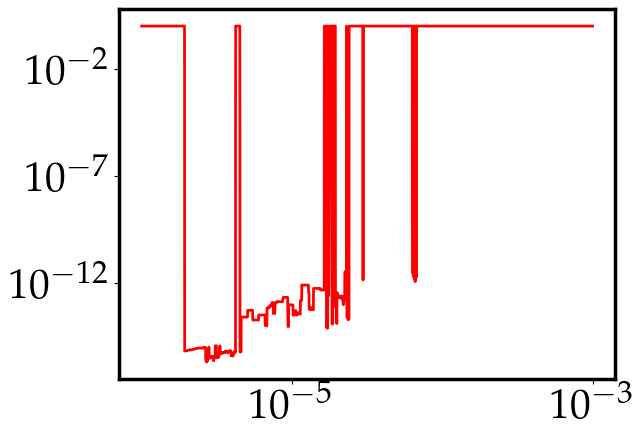

In [34]:
files = ['RBF_UF_Haloscopes','UF','ADMX','ADMX2018','ADMX2019_1','ADMX2019_2','ADMX2021',
        'CAPP-1','CAPP-2','CAPP-3','CAPP-4','CAPP-5','CAPP-6','CAST-CAPP','HAYSTAC_highres','HAYSTAC_2020_highres',
        'ORGAN','ORGAN-1a','TASEH','GrAHal','ADMX_Sidecar','ADMX_Sidecar_JTWPA',
        'QUAX','QUAX2','RADES','HAYSTAC_2022']

mmin = 1e-3
mmax = 1e-6
nvals = 3000
mvals = logspace(log10(mmin),log10(mmax),nvals)

g = zeros(shape=nvals)
for file in files:
    print(file)
    dat = loadtxt("limit_data/AxionPhoton/"+file+".txt")
    g1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    g1[mvals<amin(dat[:,0])] = inf
    g1[mvals>amax(dat[:,0])] = inf
    g = column_stack((g,g1))
g = g[:,1:]

g = amin(g,1)

g[g==inf] = 1
plt.loglog(mvals,g,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/AxionPhoton/Haloscopes_Combined_microeV-meV.txt',column_stack((mvals,g)))
